In [160]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import GaussianNB
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix


In [161]:
!head /content/drive/MyDrive/data_train.csv

doc_id,titre,type,difficulte,cout,ingredients,recette
recette_221358.xml,"Feuilleté de saumon et de poireau, sauce aux crevettes",Plat principal,Facile,Moyen,"- 1 gros pavé de saumon - 100 g de crevettes décortiquées - 2 poireaux moyens - 1 oignon  - 1 pâte feuilletée - 25 cl de crème liquide épaisse - Un peu de vin blanc - 1/2 citron jaune - 1 jaune d'oeuf - Un peu d'huile d'olive  - Une noisette de beurre - Sel, aneth","Couper finement le blanc et un peu de vert des poireaux en rondelle. Éplucher et couper l'oignon. Faire chauffer l'huile d'olive et le beurre dans une poêle. Y faire revenir à feu doux les poireaux et l'oignon environ 15 minutes. En fin de cuisson ajouter le vin blanc, un peu d'aneth et du sel. Pendant ce temps faire cuire le saumon dans une poêle huilée. En fin de cuisson le faire griller sur feu vif. Préparer la sauce : mélanger les crevettes, le 1/2 citron jaune, la crème, le sel et l'aneth. Ajouter un peu de sauce à la préparation des poireaux. Préchauffer le four

In [162]:
df = pd.read_csv('/content/drive/MyDrive/my_data.csv')
df.head(5)


,doc_id,titre,type,difficulte,cout,ingredients,recette
0,recette_221358.xml,"Feuilleté de saumon et de poireau, sauce aux c...",Plat principal,Facile,Moyen,- 1 gros pavé de saumon - 100 g de crevettes d...,Couper finement le blanc et un peu de vert des...
1,recette_48656.xml,Cake poulet/moutarde/amandes,Entrée,Très facile,Bon marché,- 3 œufs - 150 g de farine - 1 sachet de levur...,"Couper finement l'échalote, la faire revenir à..."
2,recette_30049.xml,Bûche à la truite fumée (7ème rencontre),Entrée,Moyennement difficile,Assez Cher,- 800 g de filet de truite saumonnée fumée en ...,Faites blanchir les épinards à l'eau bouillant...
3,recette_71424.xml,Gâteau au yaourt au coco sans huile de laetitia,Dessert,Très facile,Bon marché,- 1 pot de yaourt - 1 pot de lait de coco - 3 ...,Mélanger dans l'ordre tous les ingrédients en ...
4,recette_217204.xml,Crêpes au canard laqué,Entrée,Moyennement difficile,Moyen,- 90 g de farine - 45 g de maïzena - 2 œufs - ...,"Fouetter les œufs avec l'eau, le lait et le su..."


In [163]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        doc_id  titre   type  difficulte   cout  ingredients  recette
0       False  False  False       False  False        False    False
1       False  False  False       False  False        False    False
2       False  False  False       False  False        False    False
3       False  False  False       False  False        False    False
4       False  False  False       False  False        False    False
...       ...    ...    ...         ...    ...          ...      ...
12468   False  False  False       False  False        False    False
12469   False  False  False       False  False        False    False
12470   False  False  False       False  False        False    False
12471   False  False  False       False  False        False    False
12472   False  False  False       False  False        False    False

[12473 rows x 7 columns]>

In [164]:
validation_size = 0.2  # 20% pour la validation, 80% pour l'entraînement

# Séparation des données en ensembles d'entraînement et de validation
train_data, validation_data = train_test_split(df, test_size=validation_size, random_state=42)

train_size = len(train_data)
validation_size = len(validation_data)

(train_size, validation_size)

(9978, 2495)

In [165]:
# Sauvegarde des ensembles d'entraînement et de validation en fichiers CSV
train_data_path = '/content/drive/MyDrive/train_data.csv'
validation_data_path = '/content/drive/MyDrive/validation_data.csv'

train_data.to_csv(train_data_path, index=False)
validation_data.to_csv(validation_data_path, index=False)

(train_data_path, validation_data_path)

('/content/drive/MyDrive/train_data.csv',
 '/content/drive/MyDrive/validation_data.csv')

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
# visualisation de la matrice de confusion

def plot_confusion_matrix(conf_matrix, class_names):
    # Transforme la matrice de confusion en DataFrame pour une meilleure visualisation avec Seaborn
    conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

    # Crée un heatmap de Seaborn avec les valeurs de la matrice de confusion
    plt.figure(figsize=(4,3))
    sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Matrice de Confusion')
    plt.ylabel('Vraies classes')
    plt.xlabel('Classes prédites')
    plt.show()


# Baseline Classe Majoritaire

Baseline


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

       Dessert       0.00      0.00      0.00       726
        Entrée       0.00      0.00      0.00       611
Plat principal       0.46      1.00      0.63      1158

      accuracy                           0.46      2495
     macro avg       0.15      0.33      0.21      2495
  weighted avg       0.22      0.46      0.29      2495





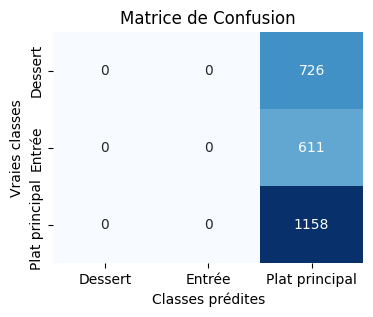

In [168]:

def Classe_Majoritaire(train_data_path, validation_data_path):

    train_data = pd.read_csv(train_data_path)
    validation_data = pd.read_csv(validation_data_path)

    y_train = train_data['type']
    y_validation = validation_data['type']

    # Création du modèle DummyClassifier avec la stratégie 'most_frequent'
    dummy_clf = DummyClassifier(strategy="most_frequent")

    # Entraînement du modèle sur l'ensemble d'entraînement
    dummy_clf.fit([0] * len(y_train), y_train)

    # Prédictions sur l'ensemble de validation
    y_pred_validation = dummy_clf.predict([0] * len(y_validation))

    # Évaluation de la baseline
    report = classification_report(y_validation, y_pred_validation)
    conf_matrix = confusion_matrix(y_validation, y_pred_validation)

    return report,conf_matrix

print('Baseline')
report,conf_matrix = Classe_Majoritaire(train_data_path, validation_data_path)
print(report)
print("\n")
class_names = ['Dessert', 'Entrée', 'Plat principal']
plot_confusion_matrix(conf_matrix, class_names)

In [169]:
test_filepath = '/content/drive/MyDrive/test_data.csv'

In [170]:
# Fonction pour charger et préparer le dataset
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)

    df['text'] = df['titre'] + ' ' + df['ingredients'] + ' ' + df['recette'] # + ' ' + df['difficulte'] + ' ' + df['cout']

    return df['text'], df['type']




# **Bag Of Words**

Accuracy: 0.84
Classification Report:
                 precision    recall  f1-score   support

       Dessert       0.98      1.00      0.99       726
        Entrée       0.69      0.68      0.68       611
Plat principal       0.84      0.84      0.84      1158

      accuracy                           0.84      2495
     macro avg       0.84      0.84      0.84      2495
  weighted avg       0.84      0.84      0.84      2495



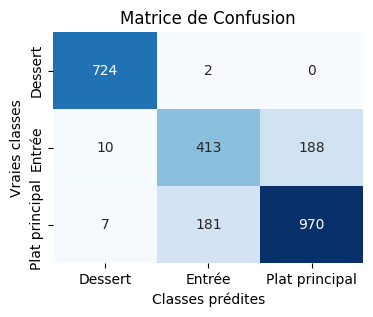

In [171]:

# Fonction pour vectoriser les données textuelles
def vectorize_text(X_train, X_dev):
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_dev_vec = vectorizer.transform(X_dev)
    return X_train_vec, X_dev_vec, vectorizer

# Fonction pour entraîner le modèle
def train_model(X_train_vec, y_train):
    classifier = MultinomialNB()
    classifier.fit(X_train_vec, y_train)
    return classifier


# Fonction pour évaluer le modèle
def evaluate_model(classifier, X_dev_vec, y_dev):
    y_pred = classifier.predict(X_dev_vec)
    accuracy = accuracy_score(y_dev, y_pred)
    report = classification_report(y_dev, y_pred)
    conf_matrix = confusion_matrix(y_dev,y_pred)

    return accuracy, report, conf_matrix


def main(train_filepath, dev_filepath):

    X_train, y_train = load_and_prepare_data(train_filepath)
    X_dev, y_dev = load_and_prepare_data(dev_filepath)

    X_train_vec, X_dev_vec, vectorizer = vectorize_text(X_train, X_dev)

    classifier = train_model(X_train_vec, y_train)

    accuracy, report,conf_matrix = evaluate_model(classifier, X_dev_vec, y_dev)


    joblib.dump(classifier, 'classifier1.joblib')
    joblib.dump(vectorizer, 'vectorizer1.joblib')

    # Afficher les résultats
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    # Afficher la matrice de confusion
    class_names = ['Dessert', 'Entrée', 'Plat principal']
    plot_confusion_matrix(conf_matrix, class_names)

if __name__ == "__main__":
    main(train_data_path,validation_data_path)



Bag Of Word
Test Accuracy: 0.86
Test Classification Report:
                 precision    recall  f1-score   support

       Dessert       0.97      1.00      0.99       407
        Entrée       0.71      0.74      0.73       337
Plat principal       0.87      0.84      0.86       644

      accuracy                           0.86      1388
     macro avg       0.85      0.86      0.86      1388
  weighted avg       0.86      0.86      0.86      1388



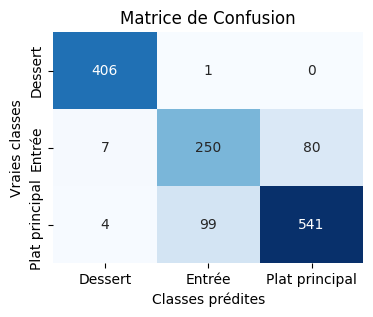

In [172]:
def test_model(test_filepath):

    classifier = joblib.load('classifier1.joblib')
    vectorizer = joblib.load('vectorizer1.joblib')

    X_test, y_test = load_and_prepare_data(test_filepath)
    X_test_vec = vectorizer.transform(X_test)

    accuracy, report,conf_matrix = evaluate_model(classifier, X_test_vec, y_test)

    print(f"Test Accuracy: {accuracy:.2f}")
    print("Test Classification Report:\n", report)
    class_names = ['Dessert', 'Entrée', 'Plat principal']
    plot_confusion_matrix(conf_matrix, class_names)

if __name__ == "__main__":
    print('Bag Of Word')
    test_model(test_filepath)


# **TF_IDF**

TF-IDF
Accuracy: 0.87
Classification Report:
                 precision    recall  f1-score   support

       Dessert       0.98      1.00      0.99       726
        Entrée       0.77      0.66      0.71       611
Plat principal       0.84      0.89      0.86      1158

      accuracy                           0.87      2495
     macro avg       0.86      0.85      0.85      2495
  weighted avg       0.86      0.87      0.86      2495





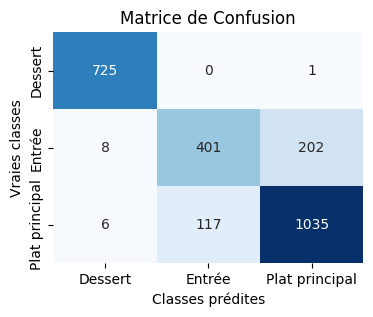

In [173]:
from sklearn.svm import SVC

print('TF-IDF')

def main(train_filepath, dev_filepath):
    # Charger les données d'entraînement
    X_train, y_train = load_and_prepare_data(train_filepath)

    # Charger les données de développement
    X_dev, y_dev = load_and_prepare_data(dev_filepath)

    # Calculer les vecteurs TF-IDF pour les ensembles d'entraînement et de développement
    vectorizer = TfidfVectorizer(max_features=3000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_dev_tfidf = vectorizer.transform(X_dev)

    # Entraîner le modèle SVM
    classifier = SVC(kernel='linear')  # Utiliser le noyau linéaire pour SVM
    classifier.fit(X_train_tfidf, y_train)

    # Évaluer le modèle sur l'ensemble de développement
    y_pred = classifier.predict(X_dev_tfidf)
    accuracy = accuracy_score(y_dev, y_pred)
    report = classification_report(y_dev, y_pred)
    conf_matrix = confusion_matrix(y_dev, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("\n")
    class_names = ['Dessert', 'Entrée', 'Plat principal']
    plot_confusion_matrix(conf_matrix, class_names)


    joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
    joblib.dump(classifier, 'svm_classifier.joblib')

if __name__ == "__main__":
    main(train_data_path,validation_data_path)


TF-IDF
Test Accuracy: 0.88
Test Classification Report:
                 precision    recall  f1-score   support

       Dessert       0.98      1.00      0.99       407
        Entrée       0.77      0.72      0.74       337
Plat principal       0.86      0.89      0.87       644

      accuracy                           0.88      1388
     macro avg       0.87      0.87      0.87      1388
  weighted avg       0.88      0.88      0.88      1388



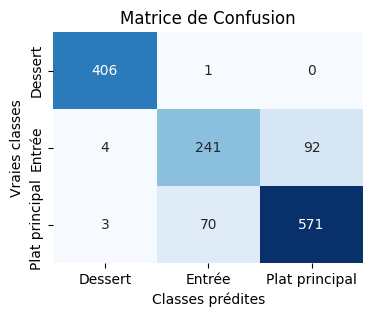

In [174]:
def test_model_TFIDF(test_filepath):
    # Charger le vectorisateur et le modèle
    vectorizer = joblib.load('tfidf_vectorizer.joblib')
    classifier = joblib.load('svm_classifier.joblib')

    # Charger et préparer les données de test
    X_test, y_test = load_and_prepare_data(test_filepath)
    X_test_tfidf = vectorizer.transform(X_test)

    # Faire des prédictions et évaluer le modèle
    y_pred_test = classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred_test)
    report = classification_report(y_test, y_pred_test)
    conf_matrix = confusion_matrix(y_test, y_pred_test)


    print(f"Test Accuracy: {accuracy:.2f}")
    print("Test Classification Report:\n", report)
    class_names = ['Dessert', 'Entrée', 'Plat principal']
    plot_confusion_matrix(conf_matrix, class_names)

if __name__ == "__main__":
    print('TF-IDF')
    test_model_TFIDF(test_filepath)

# **WORD2VEC**

Accuracy: 0.83
Classification Report:
                 precision    recall  f1-score   support

       Dessert       0.98      0.99      0.98       726
        Entrée       0.70      0.52      0.60       611
Plat principal       0.78      0.88      0.83      1158

      accuracy                           0.83      2495
     macro avg       0.82      0.80      0.80      2495
  weighted avg       0.82      0.83      0.82      2495



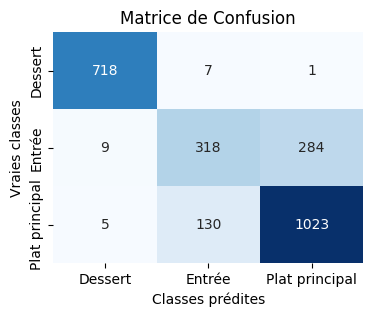

In [177]:
from sklearn.linear_model import LogisticRegression

# Fonction pour entraîner un modèle Word2Vec sur le corpus
def train_word2vec(corpus):
    # Prétraitement des données pour Word2Vec
    sentences = [sentence.split() for sentence in corpus]
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    model.train(sentences, total_examples=len(sentences), epochs=10)
    return model

# Fonction pour vectoriser les données en utilisant le modèle Word2Vec
def vectorize_with_word2vec(model, corpus):
    vectorized_data = np.array([
        np.mean([model.wv[word] for word in sentence.split() if word in model.wv]
                or [np.zeros(model.vector_size)], axis=0)
        for sentence in corpus
    ])
    return vectorized_data

# Fonction pour entraîner le modèle de classification
def train_classifier(X_train_vec, y_train):
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(X_train_vec, y_train)
    return classifier

# Fonction pour évaluer le modèle de classification
def evaluate_model(classifier, X_dev_vec, y_dev):
    y_pred = classifier.predict(X_dev_vec)
    accuracy = accuracy_score(y_dev, y_pred)
    report = classification_report(y_dev, y_pred)
    conf_matrix =  confusion_matrix(y_dev, y_pred)
    return accuracy, report,conf_matrix

def main(train_filepath, dev_filepath):
    X_train, y_train = load_and_prepare_data(train_filepath)
    X_dev, y_dev = load_and_prepare_data(dev_filepath)

    # Entraîner le modèle Word2Vec
    word2vec_model = train_word2vec(pd.concat([X_train, X_dev]))

    # Vectoriser les données textuelles
    X_train_vec = vectorize_with_word2vec(word2vec_model, X_train)
    X_dev_vec = vectorize_with_word2vec(word2vec_model, X_dev)

    # Entraîner le modèle de classification
    classifier = train_classifier(X_train_vec, y_train)

    # Évaluer le modèle
    accuracy, report,conf_matrix = evaluate_model(classifier, X_dev_vec, y_dev)

    joblib.dump(classifier, 'LR_classifier.joblib')
    word2vec_model.save("word2vec.model")

    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    class_names = ['Dessert', 'Entrée', 'Plat principal']
    plot_confusion_matrix(conf_matrix, class_names)
if __name__ == "__main__":
        main(train_data_path,validation_data_path)


Word2vec
Test Accuracy: 0.84
Test Classification Report:
                 precision    recall  f1-score   support

       Dessert       0.98      0.99      0.98       407
        Entrée       0.74      0.57      0.64       337
Plat principal       0.80      0.89      0.84       644

      accuracy                           0.84      1388
     macro avg       0.84      0.82      0.82      1388
  weighted avg       0.84      0.84      0.84      1388



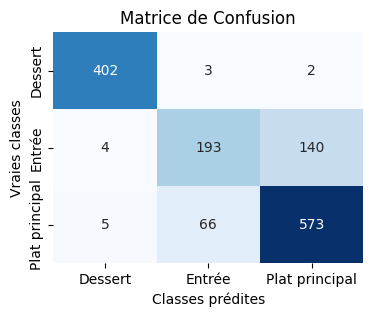

In [178]:
def test_model_word2vec(test_filepath):

    classifier = joblib.load('LR_classifier.joblib')
    word2vec_model = Word2Vec.load("word2vec.model")

    X_test, y_test = load_and_prepare_data(test_filepath)
    X_test_vec = vectorize_with_word2vec(word2vec_model, X_test)

    accuracy, report,conf_matrix = evaluate_model(classifier, X_test_vec, y_test)

    print(f"Test Accuracy: {accuracy:.2f}")
    print("Test Classification Report:\n", report)
    class_names = ['Dessert', 'Entrée', 'Plat principal']
    plot_confusion_matrix(conf_matrix, class_names)


if __name__ == "__main__":
    print('Word2vec')
    test_model_word2vec(test_filepath)